In [1]:
import pandas as pd

In [32]:
df = pd.read_csv('../data/raw_data/SPOTIFY_REVIEWS.csv')

In [33]:
df.head(3)

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,14a011a8-7544-47b4-8480-c502af0ac26f,152618553977019693742,A Google user,Use it every day,5,1,1.1.0.91,2014-05-27 14:21:48
1,1,bfa8876b-470e-4640-83a7-77427f7f37e8,234382942865437071667,A Google user,"I enjoy the awesome UI of this app, and it has...",5,4,1.1.0.91,2014-05-27 14:36:02
2,2,70e8252f-058a-47d9-b066-df9e1571c970,174473604608358796368,A Google user,Love it! Especially the new design!,5,2,1.1.0.91,2014-05-27 14:40:01


In [34]:
print(df.isnull().sum())

Unnamed: 0                 0
review_id                  0
pseudo_author_id           0
author_name                0
review_text             1022
review_rating              0
review_likes               0
author_app_version    666423
review_timestamp           0
dtype: int64


In [35]:
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'])

In [36]:
df.dropna(inplace=True)

C:\Users\PF2L6BL6\AppData\Local\Temp\ipykernel_33820\573589805.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_reviews = df.resample('M').size()


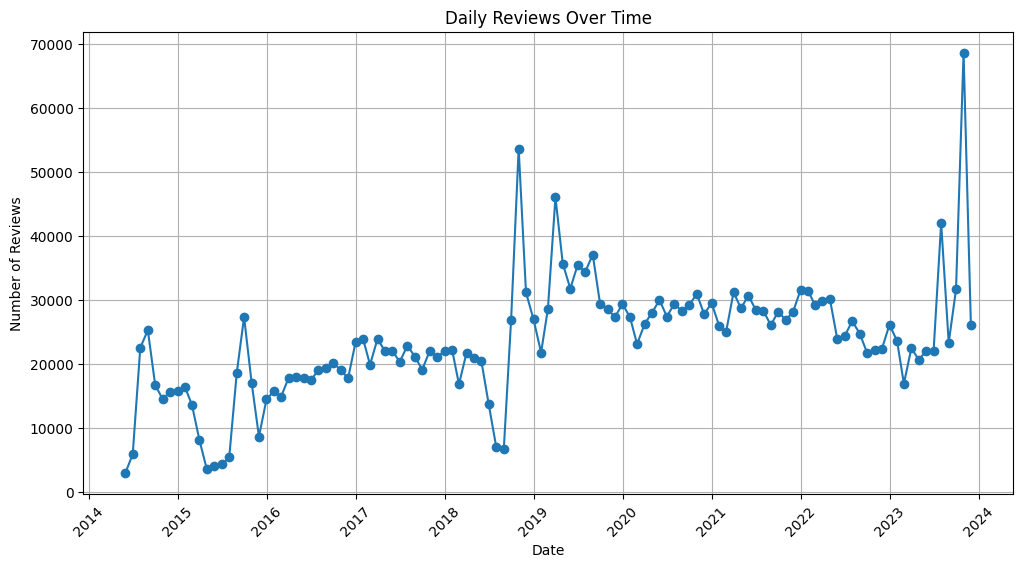

In [37]:
import matplotlib.pyplot as plt

# Set review_timestamp as index
df.set_index('review_timestamp', inplace=True)

# Resample the data to daily frequency and count reviews
daily_reviews = df.resample('M').size()

# Plot the time series of daily reviews
plt.figure(figsize=(12, 6))
plt.plot(daily_reviews, marker='o', linestyle='-')
plt.title('Daily Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid()
plt.show()

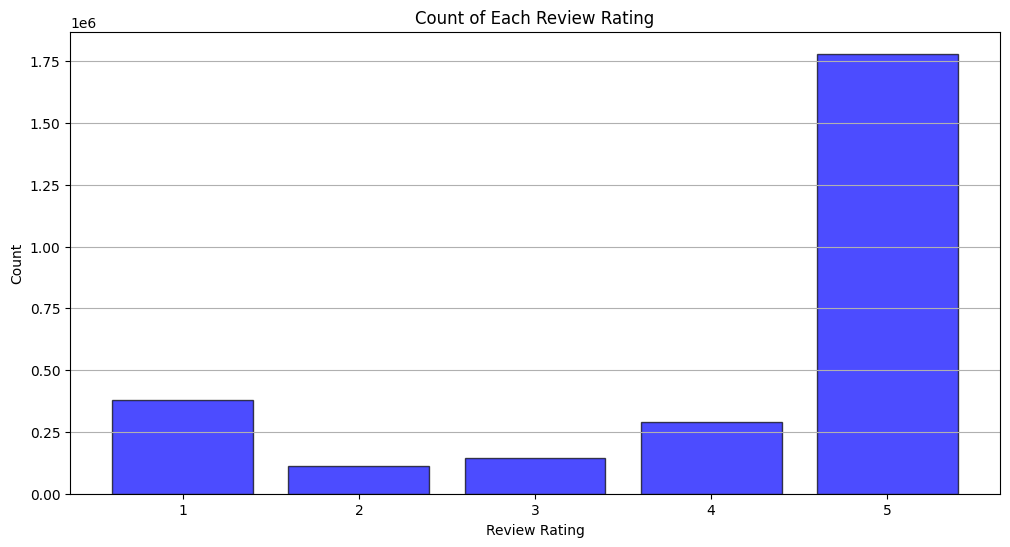

In [38]:
rating_counts = df['review_rating'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(rating_counts.index, rating_counts.values, color='blue', edgecolor='black', alpha=0.7)
plt.title('Count of Each Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(range(1, 6))
plt.grid(axis='y')
plt.show()

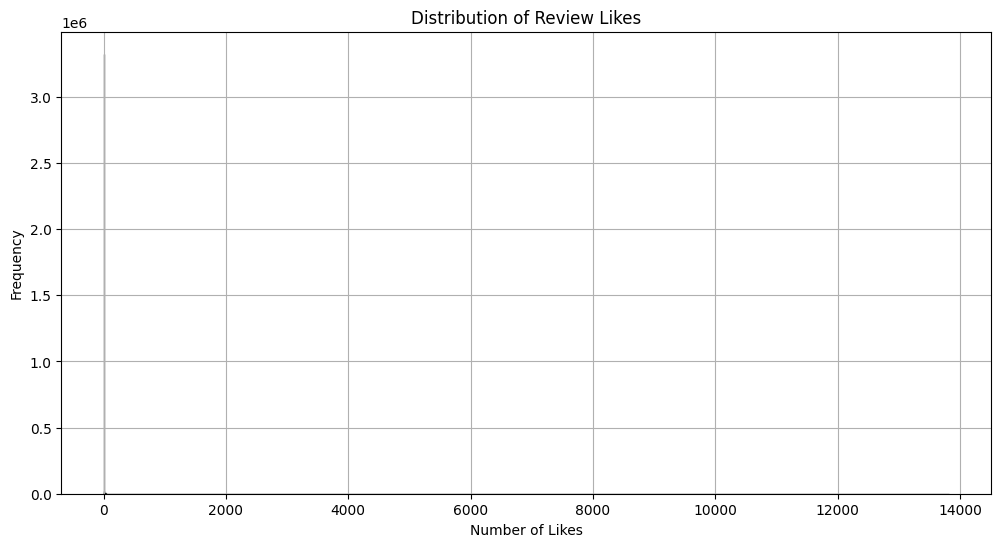

count    3.377423e+06
mean     1.092705e+00
std      3.350004e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.382400e+04
Name: review_likes, dtype: float64


In [29]:
# Plot the distribution of review likes
plt.figure(figsize=(12, 6))
plt.hist(df['review_likes'], bins=range(0, df['review_likes'].max() + 1, 5), alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Review Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Summary statistics
print(df['review_likes'].describe())


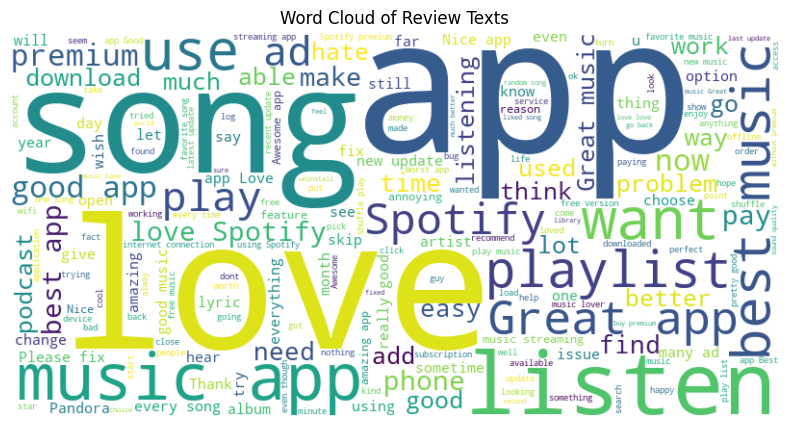

In [31]:
from wordcloud import WordCloud

# Combine all review texts into one string
all_reviews = ' '.join(df['review_text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()


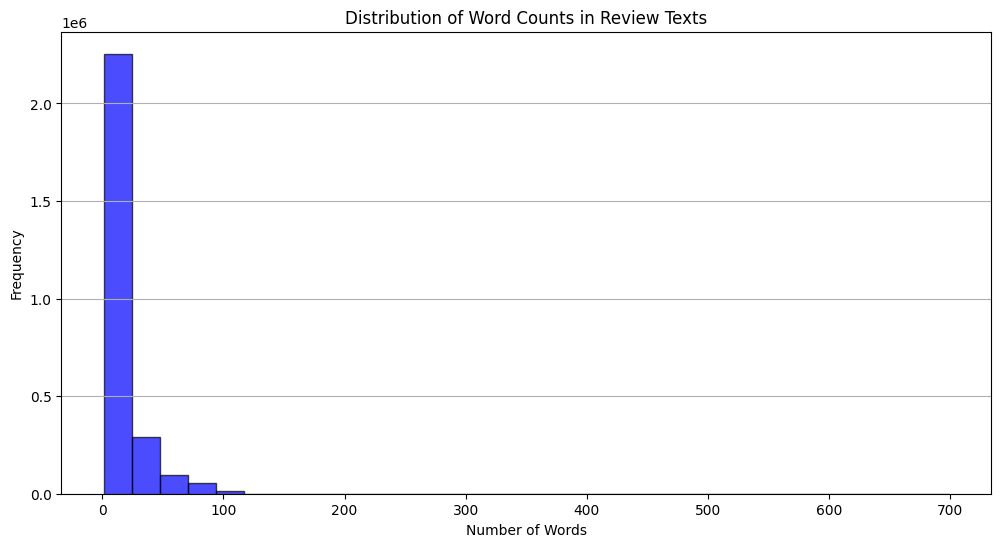

count    2.710400e+06
mean     1.364139e+01
std      1.817432e+01
min      1.000000e+00
25%      2.000000e+00
50%      7.000000e+00
75%      1.700000e+01
max      6.990000e+02
Name: word_count, dtype: float64


In [39]:
# Calculate the number of words in each review
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

# Plot the distribution of word counts
plt.figure(figsize=(12, 6))
plt.hist(df['word_count'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Word Counts in Review Texts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Summary statistics for word counts
print(df['word_count'].describe())

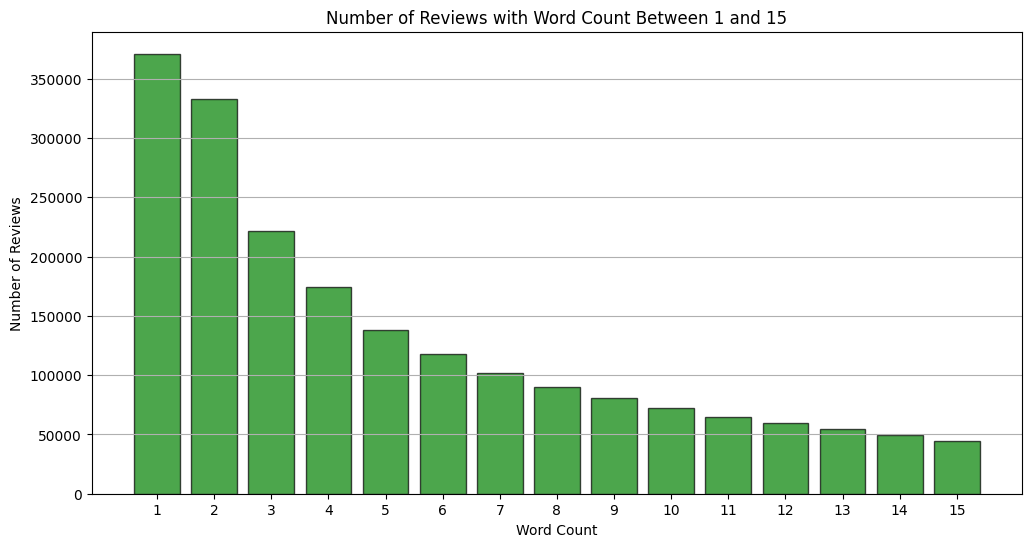

Total number of reviews with 1-15 words: 1972562


In [40]:
import matplotlib.pyplot as plt

# Calculate the number of words in each review (if not already done)
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

# Filter reviews that have word counts between 1 and 15
filtered_reviews = df[df['word_count'].between(1, 15)]

# Count the number of reviews for each word count
word_count_dist = filtered_reviews['word_count'].value_counts().sort_index()

# Plot the distribution of reviews with word count between 1 and 15
plt.figure(figsize=(12, 6))
plt.bar(word_count_dist.index, word_count_dist.values, color='green', edgecolor='black', alpha=0.7)
plt.title('Number of Reviews with Word Count Between 1 and 15')
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 16))  # Display word counts from 1 to 15
plt.grid(axis='y')
plt.show()

# Print the number of reviews in this range
print(f"Total number of reviews with 1-15 words: {len(filtered_reviews)}")


In [49]:
# Filter reviews that contain exactly one word
one_word_reviews = df[df['word_count'] == 4]

# Randomly sample data (you can specify the number of samples)
sampled_reviews = one_word_reviews.sample(n=50)  # Change 'n' to the desired number of samples

# Display the sampled reviews
print(sampled_reviews[['review_text']])


                                              review_text
review_timestamp                                         
2019-11-30 07:08:42                      My wife loves it
2018-12-06 03:38:52                    Seems great so far
2014-06-07 18:07:06            Couldn't live without it!!
2022-02-05 10:22:19                  Very nice app thanks
2021-03-31 18:48:05                  Great app for music.
2018-02-23 07:43:37                 Well, nice music app.
2023-04-02 14:36:37                      Add too much 😡😡😡
2021-08-24 09:57:59          Best music streaming service
2017-04-03 22:30:12                        So far so good
2023-10-16 23:45:11               The Best Servicios ever
2019-08-26 08:21:08                  Life changing for me
2019-03-25 13:57:24                  Good Audio quality 👌
2021-09-29 18:51:24  Pretty accessible and user-friendly.
2021-07-15 09:40:58          song less advertisement more
2018-11-08 04:36:06                     I really love it.
2017-09-16 07:

* remove emoticon
* remove review_text that only contain emoticon
* remove review_text that only contain one word
